### [22.05.09] clustering 재 진행
* 행정동 별 입지특성 (Feature: 토지피복비율)

In [6]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 행정동별 토지 면적 데이터
dong_landarea = pd.read_csv("../resources/processedData/입지특성_행정동별_토지피복_면적.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 토지 피복 비율 데이터 Load
dong_landscape = pd.read_csv("../resources/processedData/입지특성_행정동별 feature.csv", encoding="utf8")

In [7]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong = pd.DataFrame(dong_list, columns=["행정동"])

# 매장 이름 추출
store_list = list(store_dong["매장명"])

In [8]:
dong_landscape

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,개포1동,16,0,3,0.424773,0.034857,0.540370
1,개포2동,31,20,24,0.178740,0.174853,0.646407
2,개포4동,33,0,23,0.441235,0.037082,0.521683
3,논현1동,22,14,36,0.489673,0.014120,0.496207
4,논현2동,22,16,32,0.575432,0.012579,0.411990
5,대치1동,19,10,19,0.266545,0.129195,0.604261
6,대치2동,30,9,25,0.508280,0.052936,0.438784
7,대치4동,16,6,37,0.511551,0.002936,0.485514
8,도곡1동,26,8,15,0.474004,0.023388,0.502608
9,도곡2동,18,6,8,0.506491,0.058701,0.434808


In [9]:
## feature 뽑기
# dong feature 뽑기
dong_feature = pd.merge(dong, dong_landscape, on = "행정동", how = "left")
dong_feature

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,청담동,23,11,21,0.521318,0.045404,0.433278
1,일원1동,16,2,19,0.243868,0.140781,0.615351
2,역삼2동,27,7,24,0.471216,0.031786,0.496998
3,역삼1동,49,33,83,0.611696,0.010595,0.377709
4,신사동,12,6,18,0.568069,0.083859,0.348072
5,수서동,17,14,10,0.341908,0.148923,0.509169
6,세곡동,66,0,30,0.282990,0.081850,0.635160
7,삼성2동,24,17,30,0.449894,0.024653,0.525454
8,삼성1동,30,20,21,0.644026,0.024718,0.331256
9,대치4동,16,6,37,0.511551,0.002936,0.485514


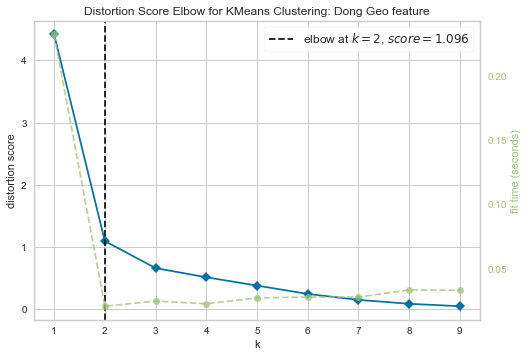

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Geo feature'}, xlabel='k', ylabel='distortion score'>

In [15]:
## 행정동 geofeature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
# ["버스정류장 개수", "지하철역 개수", "경쟁점 개수", "상업지역 비율",	"문화체육휴양시설 비율", "주거지역 비율"]
dong_geofeature_data = dong_feature[["상업지역 비율","문화체육휴양시설 비율", "주거지역 비율"]].values

dong_geofeature_data = MinMaxScaler().fit_transform(dong_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geo feature")
visualizer.fit(dong_geofeature_data)
visualizer.show()